In [24]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
SRC = '/Users/fathe/OneDrive/Documents/UK/MFF/Thesis/input'
videos = [file for file in os.listdir(SRC) if file.endswith("MP4") and file.startswith("GX")]
axis_horizontal = "y_shift"
axis_horizontal_diff = "y_shift_diff"
axis_vertical = "x_shift"
axis_vertical_diff = "x_shift_diff"

In [26]:
videos

['GX010966.MP4',
 'GX010967.MP4',
 'GX010968.MP4',
 'GX010977.MP4',
 'GX010978.MP4',
 'GX010998.MP4']

In [27]:
video = videos[-1]

In [28]:
video

'GX010998.MP4'

In [29]:
data = np.load(os.path.join(SRC, video+"-motion_positions.npy"))

In [17]:
df = pd.DataFrame(data, columns=["frame_ID", "y_shift", "x_shift"])

In [22]:
df

,frame_ID,y_shift,x_shift
0,1.0,0.000000,0.000000
1,2.0,-0.280358,0.304064
2,3.0,-0.142211,-0.098344
3,4.0,-0.043292,0.125309
4,5.0,-0.094903,0.213721
...,...,...,...
17035,17036.0,-1555.194465,32186.879066
17036,17037.0,-1555.392151,32188.985991
17037,17038.0,-1555.591598,32191.118415
17038,17039.0,-1555.815807,32193.495468


In [23]:
df.loc[2026, "y_shift"], df.loc[2346, "y_shift"]

(-355.3687560942926, -168.34175386577044)

In [30]:
csvs = [file for file in os.listdir(SRC) if file.endswith(".csv") and file.startswith(video.removesuffix('.MP4'))]

In [31]:
scales = []
for csv in csvs:
    scales.append(int(csv.split("-")[1]))

In [32]:
csvs, scales

(['GX010998-1-0.3-intervals.csv',
  'GX010998-10-0.3-intervals.csv',
  'GX010998-2-0.3-intervals.csv',
  'GX010998-3-0.3-intervals.csv',
  'GX010998-4-0.1-20-3-8-intervals-errfilter.csv',
  'GX010998-4-0.1-7-7-9-intervals-errfilter.csv',
  'GX010998-4-0.3-7-7-999-intervals-errfilter.csv',
  'GX010998-4-0.3-intervals.csv',
  'GX010998-5-0.1-20-3-8-intervals-errfilter.csv',
  'GX010998-5-0.1-7-7-9-intervals-errfilter.csv',
  'GX010998-5-0.3-7-7-999-intervals-errfilter.csv',
  'GX010998-5-0.3-intervals.csv',
  'GX010998-6-0.1-20-3-8-intervals-errfilter.csv',
  'GX010998-6-0.1-7-7-9-intervals-errfilter.csv',
  'GX010998-6-0.3-7-7-999-intervals-errfilter.csv',
  'GX010998-6-0.3-intervals.csv',
  'GX010998-7-0.3-intervals.csv',
  'GX010998-8-0.3-intervals.csv',
  'GX010998-9-0.3-intervals.csv'],
 [1, 10, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 8, 9])

In [33]:
dfs = []
for csv in csvs:
    df = pd.read_csv(os.path.join(SRC, csv))
    if 'preprocessed' in csv:
        df.attrs['preprocessed'] = True
        metadata = np.load(os.path.join(SRC, csv).replace('-preprocessed.csv', '.npy'))
    else:
        df.attrs['preprocessed'] = False
        metadata = np.load(os.path.join(SRC, csv).replace('.csv', '.npy'))
    df.attrs['video'] = metadata[0]
    df.attrs['scale'] = metadata[1]
    df.attrs['time'] = metadata[2]
    df.attrs['fail_corner_frames'] = metadata[3]
    df.attrs['fail_good_frames'] = metadata[4]
    df.attrs['landscape'] = metadata[5]
    df.attrs['qualityLevel'] = metadata[6]
    df.attrs['minDistance'] = metadata[7]
    df.attrs['blockSize'] = metadata[8]
    df.attrs['errThreshold'] = metadata[9]
    df.set_index("frame_ID")
    dfs.append(df)

IndexError: index 6 is out of bounds for axis 0 with size 6

ppf (=pixel per frame)

In [174]:
for df in dfs:
    df[axis_horizontal_diff] = df[axis_horizontal].diff()
    df.loc[0, axis_horizontal_diff] = df[axis_horizontal].iloc[0]
    df[axis_vertical_diff] = df[axis_vertical].diff()
    df.loc[0, axis_vertical_diff] = df[axis_vertical].iloc[0]

C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\3597887404.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[axis_horizontal_diff].iloc[0] = df[axis_horizontal].iloc[0]
C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\3597887404.py:5

In [175]:
intervals_horizontal = np.load(os.path.join(SRC, video).replace(".MP4", "-intervals_horizontal.npy"))
intervals_vertical = np.load(os.path.join(SRC, video).replace(".MP4", "-intervals_vertical.npy"))
mask_horizontal = pd.Series(False, index=dfs[0].index)
mask_vertical = pd.Series(False, index=dfs[0].index)
for start, end in intervals_horizontal:
    mask_horizontal |= (dfs[0]['frame_ID'] >= start+5) & (dfs[0]['frame_ID'] <= end-5)
for start, end in intervals_vertical:    
    mask_vertical |= (dfs[0]['frame_ID'] >= start+5) & (dfs[0]['frame_ID'] <= end-5)
    
    
    
# mask ^= (dfs[0]['frame_ID'] >= 1054) & (dfs[0]['frame_ID'] <= 1054) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 6355) & (dfs[0]['frame_ID'] <= 6400) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 14355) & (dfs[0]['frame_ID'] <= 14375) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 15855) & (dfs[0]['frame_ID'] <= 15865) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 15985) & (dfs[0]['frame_ID'] <= 16005) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 16170) & (dfs[0]['frame_ID'] <= 16180) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 16470) & (dfs[0]['frame_ID'] <= 16540) #video 0
# mask ^= (dfs[0]['frame_ID'] >= 535) & (dfs[0]['frame_ID'] <= 575) #video 1
# mask ^= (dfs[0]['frame_ID'] >= 6715) & (dfs[0]['frame_ID'] <= 6730) #video 2
# mask ^= (dfs[0]['frame_ID'] >= 815) & (dfs[0]['frame_ID'] <= 830)   #video 2

In [176]:
intervals_horizontal, intervals_vertical

(array([[   92,  2229],
        [ 2723,  4865],
        [ 5296,  7433],
        [ 7741,  9880],
        [10763, 12902]]),
 array([[ 2524,  2612],
        [ 5129,  5216],
        [ 7561,  7650],
        [10022, 10086]]))

In [177]:
stats = []
dfs_horizontal = []
dfs_vertical = []
for df, csv in zip(dfs, csvs):
    df_horizontal = df[mask_horizontal]
    df_vertical = df[mask_vertical]
    dfs_horizontal.append(df_horizontal)
    dfs_vertical.append(df_vertical)
    stats.append([df.attrs['video'], df.attrs['scale'], df_horizontal[axis_horizontal_diff].mean()*df.attrs['scale'], df_horizontal[axis_horizontal_diff].median()*df.attrs['scale'], df_horizontal[axis_horizontal_diff].std()*df.attrs['scale'], len(df_horizontal), df_vertical[axis_vertical_diff].mean()*df.attrs['scale'], df_vertical[axis_vertical_diff].median()*df.attrs['scale'], df_vertical[axis_vertical_diff].std()*df.attrs['scale'], len(df_vertical), df.attrs['time'], df.attrs['fail_corner_frames'], df.attrs['fail_good_frames'], df.attrs['landscape'], df.attrs['qualityLevel'], df.attrs['minDistance'], df.attrs['blockSize'], df.attrs['errThreshold']])

In [192]:
dfs_horizontal[2].sort_values(axis_horizontal_diff, ascending=True)

,frame_ID,x_shift,y_shift,y_shift_diff,x_shift_diff
1414,1415.0,0.000000,-3523.341930,-4.423468,0.0
10975,10976.0,-1431.504873,-23200.547210,-3.907542,0.0
12772,12773.0,-1431.504873,-27957.964191,-3.625548,0.0
1469,1470.0,0.000000,-3672.409368,-3.623486,0.0
5875,5876.0,-760.391803,-12917.214326,-3.451834,0.0
...,...,...,...,...,...
472,473.0,0.000000,-969.147962,-1.720685,0.0
374,375.0,0.000000,-709.099354,-1.653844,0.0
115,116.0,0.000000,-31.590148,-1.276303,0.0
118,119.0,0.000000,-37.936210,-1.271383,0.0


In [193]:
dfs_horizontal[2].sort_values(axis_horizontal_diff, ascending=False)

,frame_ID,x_shift,y_shift,y_shift_diff,x_shift_diff
113,114.0,0.000000,-28.281066,-0.840584,0.0
118,119.0,0.000000,-37.936210,-1.271383,0.0
115,116.0,0.000000,-31.590148,-1.276303,0.0
374,375.0,0.000000,-709.099354,-1.653844,0.0
472,473.0,0.000000,-969.147962,-1.720685,0.0
...,...,...,...,...,...
5875,5876.0,-760.391803,-12917.214326,-3.451834,0.0
1469,1470.0,0.000000,-3672.409368,-3.623486,0.0
12772,12773.0,-1431.504873,-27957.964191,-3.625548,0.0
10975,10976.0,-1431.504873,-23200.547210,-3.907542,0.0


In [194]:
dfs_vertical[2].sort_values(axis_vertical_diff, ascending=True)

,frame_ID,x_shift,y_shift,y_shift_diff,x_shift_diff
10072,10073.0,-1371.890251,-22635.840974,0.0,-6.235011
10078,10079.0,-1398.775770,-22635.840974,0.0,-6.028810
10041,10042.0,-1232.830604,-22635.840974,0.0,-5.908441
10044,10045.0,-1246.072849,-22635.840974,0.0,-5.764278
10069,10070.0,-1357.779110,-22635.840974,0.0,-5.691106
...,...,...,...,...,...
10033,10034.0,-1195.372636,-22635.840974,0.0,-3.182314
10074,10075.0,-1379.979213,-22635.840974,0.0,-2.841931
10071,10072.0,-1365.655241,-22635.840974,0.0,-2.539821
10080,10081.0,-1405.645208,-22635.840974,0.0,-2.018481


In [195]:
dfs_vertical[2].sort_values(axis_vertical_diff, ascending=False)

,frame_ID,x_shift,y_shift,y_shift_diff,x_shift_diff
10077,10078.0,-1392.746961,-22635.840974,0.0,-1.933354
10080,10081.0,-1405.645208,-22635.840974,0.0,-2.018481
10071,10072.0,-1365.655241,-22635.840974,0.0,-2.539821
10074,10075.0,-1379.979213,-22635.840974,0.0,-2.841931
10033,10034.0,-1195.372636,-22635.840974,0.0,-3.182314
...,...,...,...,...,...
10069,10070.0,-1357.779110,-22635.840974,0.0,-5.691106
10044,10045.0,-1246.072849,-22635.840974,0.0,-5.764278
10041,10042.0,-1232.830604,-22635.840974,0.0,-5.908441
10078,10079.0,-1398.775770,-22635.840974,0.0,-6.028810


In [182]:
df_stats = pd.DataFrame(stats, columns=["csv", "scale", "mean_horizontal", "median_horizontal", "std_horizontal", "count_horizontal", "mean_vertical", "median_vertical", "std_vertical", "count_vertical", 'time', 'fail_corner', 'fail_good', 'landscape', 'quality_level', 'min_distance', 'block_size', 'error_threshold']).sort_values("scale")

In [183]:
df_stats

,csv,scale,mean_horizontal,median_horizontal,std_horizontal,count_horizontal,mean_vertical,median_vertical,std_vertical,count_vertical,time,fail_corner,fail_good,landscape,quality_level,min_distance,block_size,error_threshold
0,-2.0,4.0,-10.508440,-10.539760,0.853202,10649,-17.672039,-17.874711,2.347362,292,818.261950,0.0,0.0,0.0,0.1,20.0,3.0,8.0
1,-2.0,4.0,-10.549667,-10.578789,0.860518,10649,-17.694098,-17.801672,2.268585,292,789.187036,0.0,0.0,0.0,0.1,7.0,7.0,9.0
2,-2.0,4.0,-10.601794,-10.629267,0.882485,10649,-17.787515,-17.846808,2.275288,292,793.817514,1.0,0.0,0.0,0.3,7.0,7.0,999.0
3,-2.0,5.0,-10.501592,-10.601188,0.930163,10649,-17.368832,-17.439683,2.319310,292,761.354393,0.0,0.0,0.0,0.1,20.0,3.0,8.0
4,-2.0,5.0,-10.549062,-10.652108,0.944416,10649,-17.595548,-17.719376,2.251779,292,652.953073,0.0,0.0,0.0,0.1,7.0,7.0,9.0
5,-2.0,5.0,-10.624707,-10.715709,1.039984,10649,-17.720986,-17.819548,2.219868,292,722.743141,0.0,0.0,0.0,0.3,7.0,7.0,999.0
6,-2.0,6.0,-10.364944,-10.372762,0.896542,10649,-17.474218,-17.670315,2.250509,292,639.381030,0.0,0.0,0.0,0.1,20.0,3.0,8.0
7,-2.0,6.0,-10.341989,-10.360002,0.934869,10649,-17.563582,-17.597553,2.222998,292,669.680990,0.0,0.0,0.0,0.1,7.0,7.0,9.0
8,-2.0,6.0,-10.469210,-10.467236,0.944748,10649,-17.683317,-17.763254,2.227219,292,588.540523,0.0,1.0,0.0,0.3,7.0,7.0,999.0


C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\3687078622.py:5: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['std_horizontal'], 3)


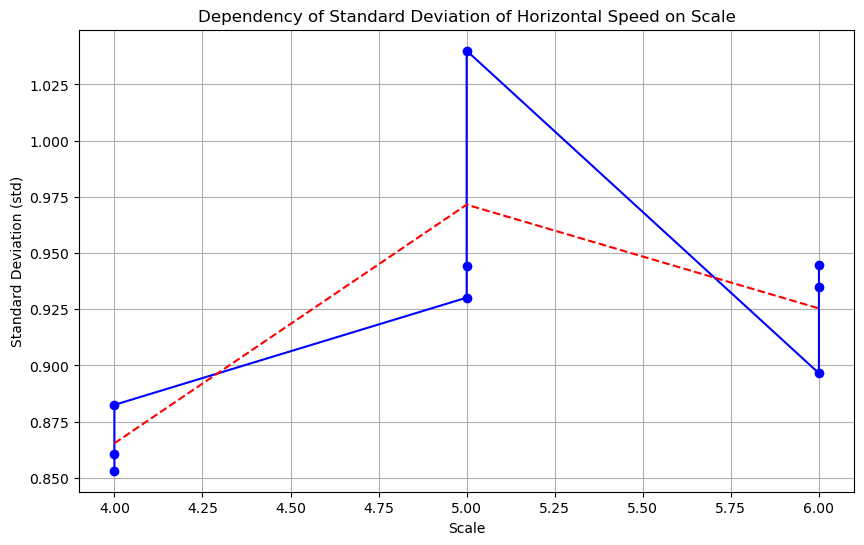

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(df_stats["scale"], df_stats["std_horizontal"], marker='o', linestyle='-', color='b', label='Standard Deviation Horizonal')

# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['std_horizontal'], 3)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='r', label='Trendline')

plt.title('Dependency of Standard Deviation of Horizontal Speed on Scale')
plt.xlabel('Scale')
plt.ylabel('Standard Deviation (std)')
plt.grid(True)
plt.show()

C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\2956802823.py:6: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['mean_horizontal'], 3)
C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\2956802823.py:10: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['median_horizontal'], 3)


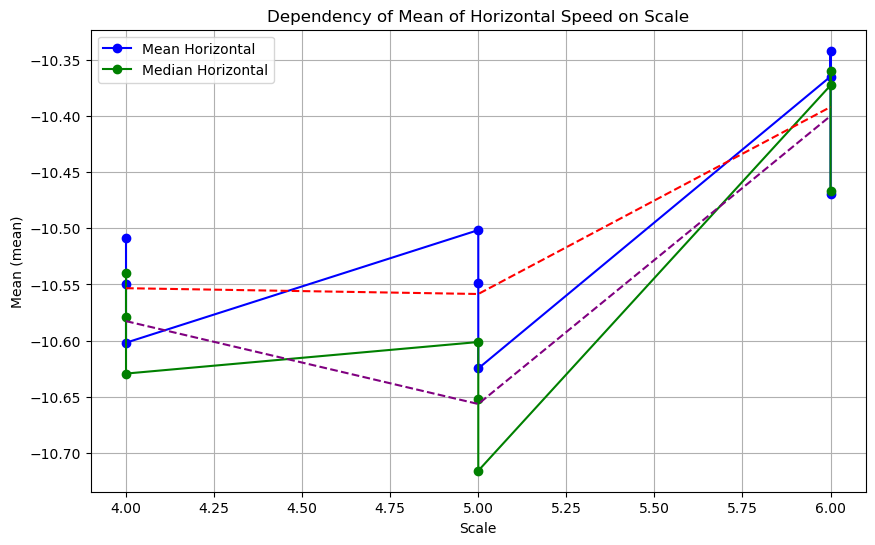

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(df_stats["scale"], df_stats["mean_horizontal"], marker='o', linestyle='-', color='b', label='Mean Horizontal')
plt.plot(df_stats["scale"], df_stats["median_horizontal"], marker='o', linestyle='-', color='g', label='Median Horizontal')

# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['mean_horizontal'], 3)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='r')
# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['median_horizontal'], 3)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='purple')

plt.title('Dependency of Mean of Horizontal Speed on Scale')
plt.xlabel('Scale')
plt.ylabel('Mean (mean)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\1857454470.py:5: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['std_vertical'], 4)


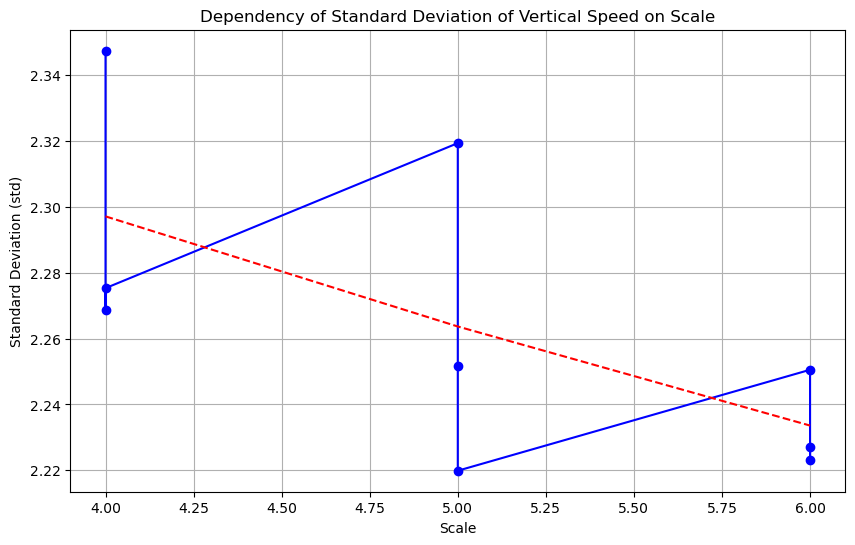

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(df_stats["scale"], df_stats["std_vertical"], marker='o', linestyle='-', color='b', label='Standard Deviation Vertical')

# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['std_vertical'], 4)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='r', label='Trendline')

plt.title('Dependency of Standard Deviation of Vertical Speed on Scale')
plt.xlabel('Scale')
plt.ylabel('Standard Deviation (std)')
plt.grid(True)
plt.show()

C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\3968687444.py:6: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['mean_vertical'], 3)
C:\Users\fathe\AppData\Local\Temp\ipykernel_22840\3968687444.py:10: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(df_stats['scale'], df_stats['median_vertical'], 3)


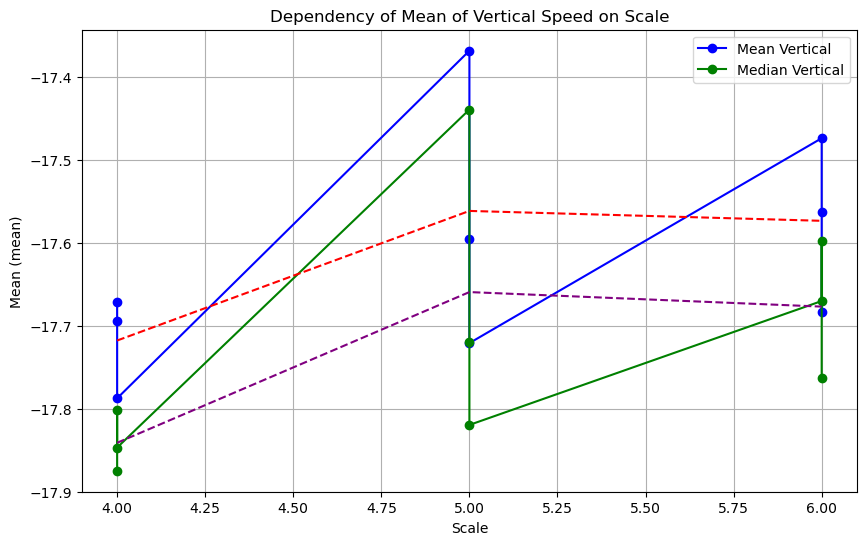

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(df_stats["scale"], df_stats["mean_vertical"], marker='o', linestyle='-', color='b', label='Mean Vertical')
plt.plot(df_stats["scale"], df_stats["median_vertical"], marker='o', linestyle='-', color='g', label='Median Vertical')

# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['mean_vertical'], 3)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='r')
# Adding a trendline
z = np.polyfit(df_stats['scale'], df_stats['median_vertical'], 3)
p = np.poly1d(z)
plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='purple')

plt.title('Dependency of Mean of Vertical Speed on Scale')
plt.xlabel('Scale')
plt.ylabel('Mean (mean)')
plt.legend()
plt.grid(True)
plt.show()

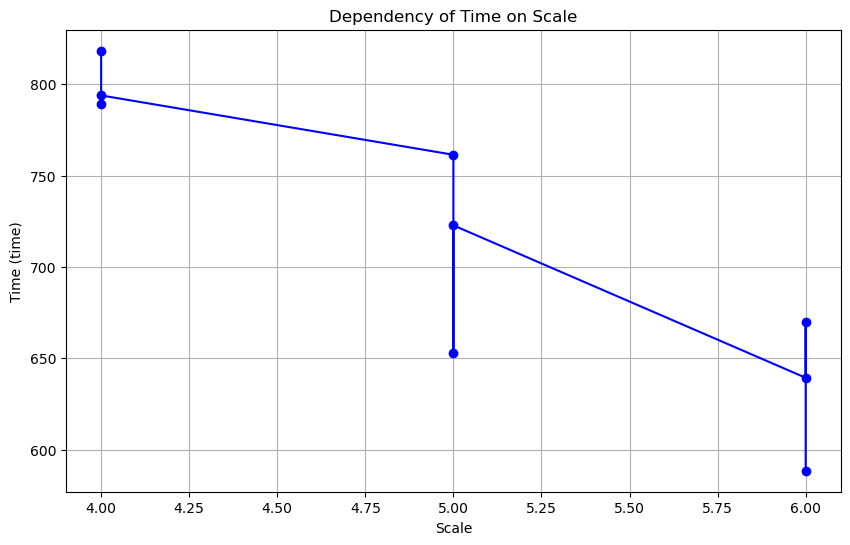

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(df_stats["scale"], df_stats["time"], marker='o', linestyle='-', color='b', label='Time')
# 
# # Adding a trendline
# z = np.polyfit(df_stats['scale'], df_stats['time'], 3)
# p = np.poly1d(z)
# plt.plot(df_stats['scale'], p(df_stats['scale']), linestyle='--', color='r', label='Trendline')

plt.title('Dependency of Time on Scale')
plt.xlabel('Scale')
plt.ylabel('Time (time)')
plt.grid(True)
plt.show()

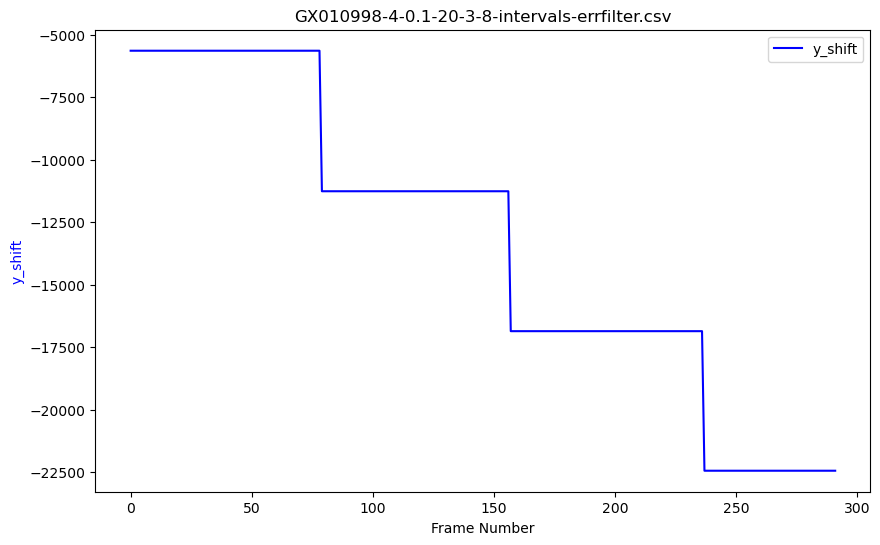

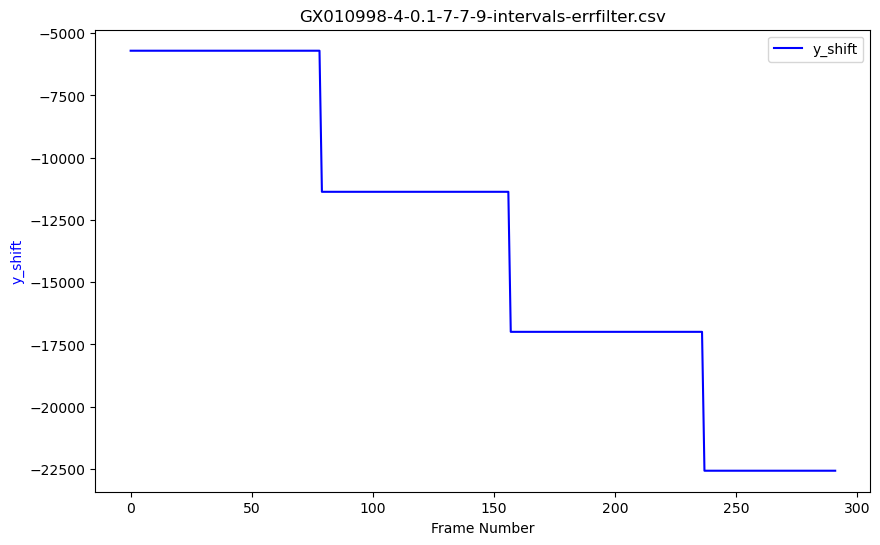

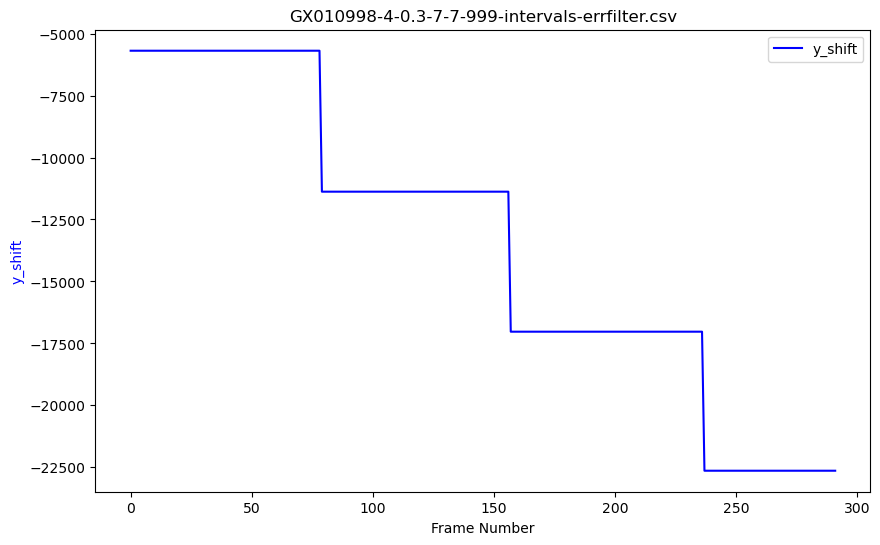

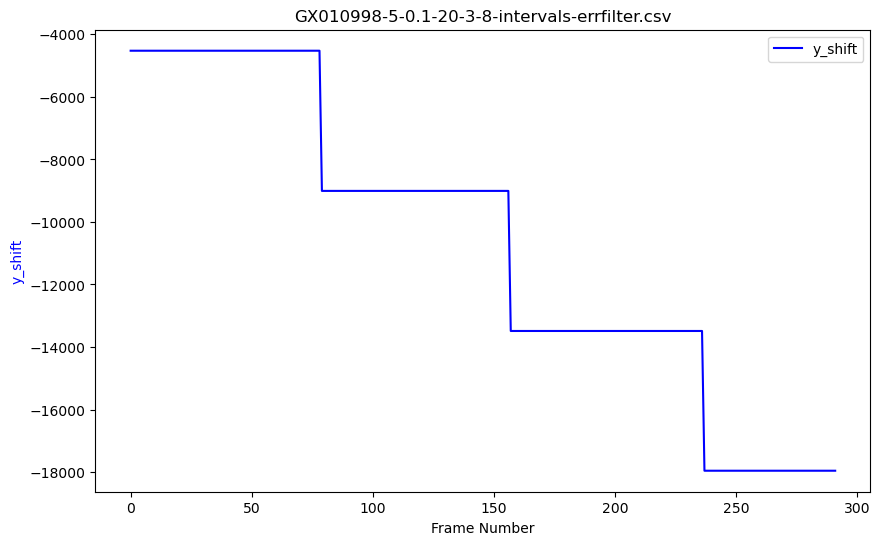

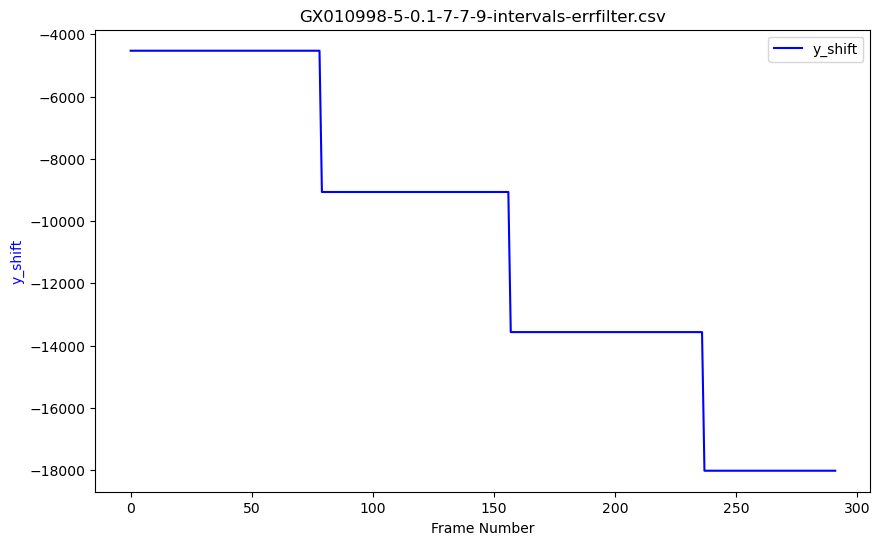

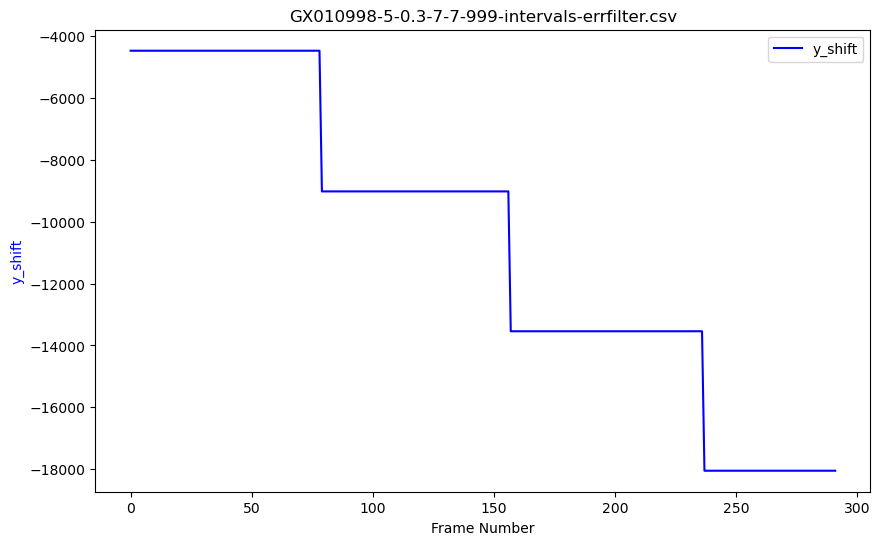

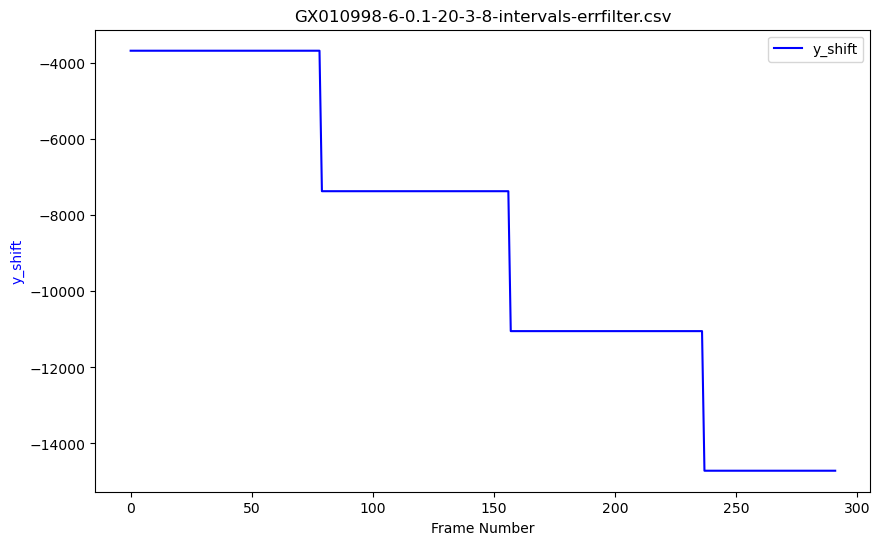

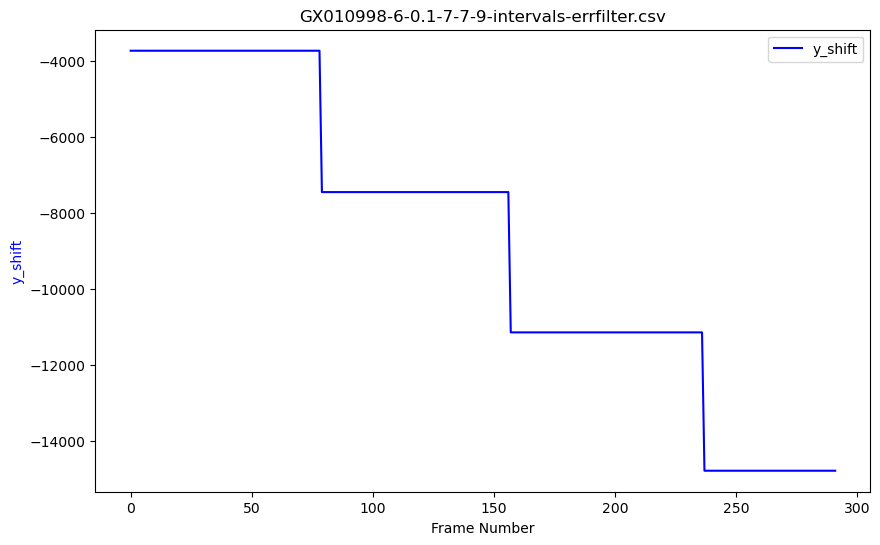

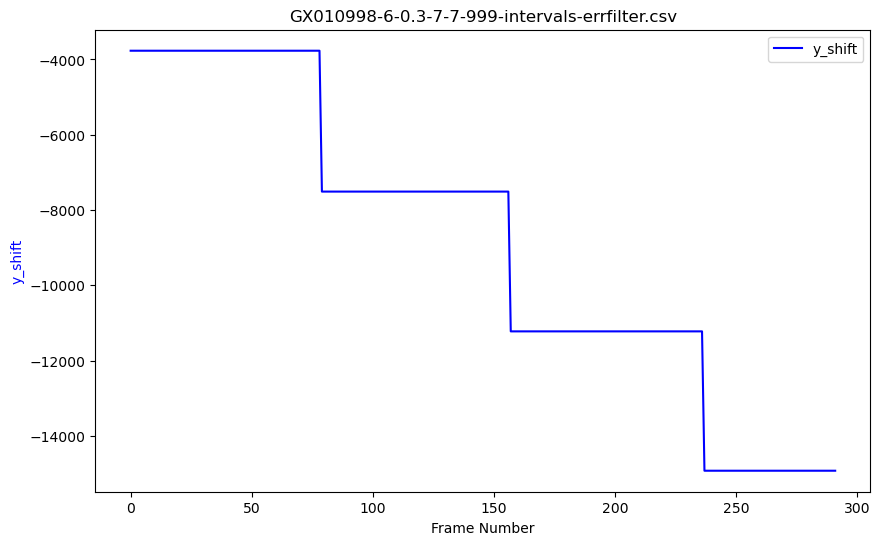

In [189]:
for csv, df_filtered in zip(csvs, dfs_vertical):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(df_filtered)), df_filtered[axis_horizontal],  label=axis_horizontal, color='blue')
    plt.title(csv)
    plt.xlabel('Frame Number')
    plt.ylabel(axis_horizontal, color='blue')
    plt.legend()
    plt.show()

In [1]:
 1/0

ZeroDivisionError: division by zero